<a href="https://colab.research.google.com/github/ThaiNguyenLongHai/Hai/blob/main/AI_report_TienVN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle
from keras.models import load_model

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
def save_data(root_folder):

    dest_size = (224, 224)
    print("Bắt đầu xử lý ảnh...")

    images = []
    labels = []

    # Lặp qua các thư mục con con trong thư mục gốc
    for folder in os.listdir(root_folder):
        if folder!='.DS_Store':
            print("Folder =",folder)
            # Lặp qua các file trong từng thư mục con  chứa các ảnh
            for file in os.listdir(root_folder+'/'+folder):
                if file!='.DS_Store':
                    # print("File=", file)
                    images.append(cv.resize(cv.imread(root_folder + '/' + folder +"/" + file), dsize=(224, 224)))
                    labels.append(folder)

    images = np.array(images)
    labels = np.array(labels)

    encoder = LabelBinarizer()
    labels = encoder.fit_transform(labels)
    print(labels)

    file = open('/content/drive/MyDrive/Colab Notebooks/TienVN.data', 'wb')
    # dump information to that file
    pickle.dump((images,labels), file)
    # close the file
    file.close()

save_data('/content/drive/MyDrive/Colab Notebooks/dataset')

Bắt đầu xử lý ảnh...
Folder = 001000
Folder = 010000
Folder = 000500
Folder = 500000
Folder = 050000
Folder = 002000
Folder = 020000
Folder = 200000
Folder = 100000
Folder = 005000
Folder = 000200
Folder = 000000
[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [7]:
def load_data():
    file = open('/content/drive/MyDrive/Colab Notebooks/TienVN.data', 'rb')

    # dump information to that file
    (pixels, labels) = pickle.load(file)

    # close the file
    file.close()

    print(pixels.shape)
    print(labels.shape)

    return pixels, labels

images, labels = load_data()

(2386, 224, 224, 3)
(2386, 11)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state = 10)
X = X_test

In [9]:
X_train.shape

(1908, 224, 224, 3)

In [10]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [11]:
model = Sequential()
model.add(Conv2D(64, (3, 3), strides=(1,1), padding = 'same', activation = 'relu', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3),strides=(1,1), padding = 'same',  activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(128, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(256, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(256, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(11, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [12]:
t = ImageDataGenerator(rotation_range=20,
                        width_shift_range=0.05,
                        height_shift_range=0.05,
                 
                        shear_range=0.05,
                        zoom_range=0.05,
                        horizontal_flip=True,
                        fill_mode='nearest')

In [13]:
h = model.fit_generator(t.flow(X_train, y_train , batch_size = 64), 
                        epochs = 25, validation_data= t.flow(X_test,y_test, batch_size=64), verbose=1)

<ipython-input-13-4a5aab44683b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  h = model.fit_generator(t.flow(X_train, y_train , batch_size = 64),


Epoch 1/25
30/30 [==============================] - 45s 930ms/step - loss: 2.4456 - accuracy: 0.1001 - val_loss: 2.3830 - val_accuracy: 0.1339
Epoch 2/25
30/30 [==============================] - 23s 764ms/step - loss: 2.3719 - accuracy: 0.1216 - val_loss: 2.3522 - val_accuracy: 0.1192
Epoch 3/25
30/30 [==============================] - 23s 759ms/step - loss: 2.2819 - accuracy: 0.1599 - val_loss: 2.1677 - val_accuracy: 0.2531
Epoch 4/25
30/30 [==============================] - 23s 760ms/step - loss: 2.0506 - accuracy: 0.2736 - val_loss: 2.1467 - val_accuracy: 0.2510
Epoch 5/25
30/30 [==============================] - 23s 763ms/step - loss: 1.8254 - accuracy: 0.3412 - val_loss: 1.6399 - val_accuracy: 0.3891
Epoch 6/25
30/30 [==============================] - 23s 763ms/step - loss: 1.4940 - accuracy: 0.4450 - val_loss: 1.3778 - val_accuracy: 0.4582
Epoch 7/25
30/30 [==============================] - 23s 765ms/step - loss: 1.4296 - accuracy: 0.4633 - val_loss: 1.4157 - val_accuracy: 0.4812

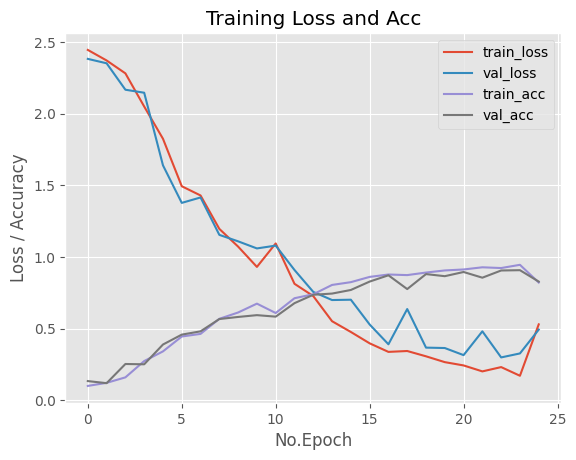

In [15]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 25), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, 25), h.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 25), h.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 25), h.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Acc")
plt.xlabel("No.Epoch")
plt.ylabel("Loss / Accuracy")
plt.legend()

In [16]:
model.save('/content/drive/MyDrive/model/Model_TienVN.h5')


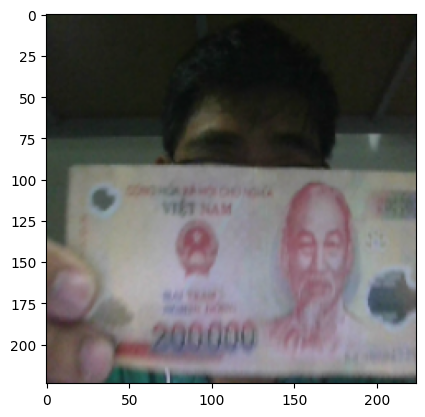

1/1 [==============================] - 0s 302ms/step
[[1.5231559e-02 7.5554021e-02 3.7777709e-04 5.2854644e-05 3.9015293e-07
  7.9154298e-02 2.7997341e-04 1.6588460e-03 8.3740167e-03 8.1930047e-01
  1.5825137e-05]]


IndexError: ignored

In [17]:
class_name = ['00000','10000','20000','50000','100000','500000']
image = X[300]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[300]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)


print(result)
print("The picture: ", class_name[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))